<a href="https://colab.research.google.com/github/wesmith4/mat210/blob/main/hw2/fishtankmc2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Math 210 - Chartier - fishtankmc2.ipynb

Python code

Description: Second version from Section 3.5 of the Math 210 notes. 

In [ ]:
# Mount Google Drive to enable file-write access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



Using Strategy 1:

   average profit     =   -1007.55
   standard deviation =      97.36


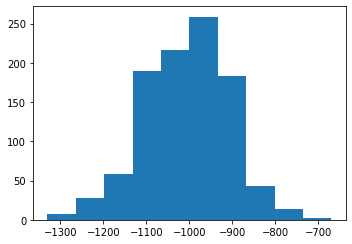


Using Strategy 2:

   average profit     =    1601.68
   standard deviation =     260.49


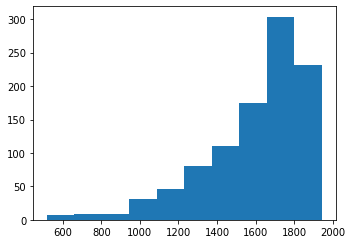

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt 

# set parameters:
number_simulations = 1000 # number of different simulations to do
number_weeks = 104         # number of weeks in each simulation
number_days = 7*number_weeks     # number of days in each simulation

filename = "/content/drive/MyDrive/Math Modeling/Simulating Stinky Fish Store/fishtankmc2-output.txt"
# f = open(filename,"w")

a = 1/7   # probability of a customer each day

days_for_delivery = 5   # days from order to delivery of new tanks
order_when_out = 0      # = 1  ==>  order a new tank when stock==0
                         # = 0  ==>  don't order when out of tanks

fixed_delivery =  7     # >0   ==>  standing order for a new tank
                         #           every so many days

options = [(1,0),(0,7)] # Set strategy options (corresponds to values above)

# profits and losses:
saleprofit = 20        # profit from selling one tank
lostloss = 10          # loss from losing a customer
overstockloss = .10    # cost of each tank overstock per night

# initialize:
profit = np.zeros(number_simulations)

# print column headings:
# f.write('customers  sold      lost   fraction_served   overstock  end_stock   profit\n')
for order_when_out, fixed_delivery in options:
  strategy = 'Strategy 1' if order_when_out == 1 else 'Strategy 2'
  print('\nUsing {}:'.format(strategy))
  for sim in range(number_simulations):
    # initialize:
    random_nums= np.random.rand(number_days)   # array of random numbers to use each day
    total_cust = 0
    total_sold = 0
    total_lost = 0
    stock = 1   # number of tanks in stock
    deliv = -1  # number of days until delivery of tank on order
                # -1 means none on order
    overstock = 0  # increment every night by number of excess tanks in stock

    # main loop for a single simulation:

    day = -1
    for week in range(number_weeks):
      for weekday in range(7):
        day += 1              # day in the simulation
        sold = 0
        lost = 0
        if deliv == 0:
          stock += 1   # a new tank is delivered
                      # at the beginning of the day
        if deliv >= 0:
          deliv -= 1   # days till next delivery

        if (fixed_delivery and day % fixed_delivery == 0):   # fixed bug in notes!
          # A new tank is delivered every so many days regardless of stock
          stock += 1

        # use random number to decide how many customers arrived
        # Here assume 0 or 1:
        if random_nums[day] < a:
          customers = 1
        else:
          customers = 0      

        if customers==1:
          if stock > 0:     # we have a tank to sell the customer
              sold  += 1
              stock -= 1
          else:
              lost += 1      # we didn't have a tank and lost a customer
      
        if (order_when_out & stock==0 & deliv < 0):
            # none in stock and none on order
          deliv = days_for_delivery  # order another

        if stock > 1:
          overstock += (stock - 1)

        # keep track of total statistics:
        total_cust += customers
        total_sold += sold
        total_lost += lost
        # stock_record(day) = stock  # keep track of stock on each day

    fraction_served = total_sold / total_cust

    profit[sim] = total_sold*saleprofit - total_lost*lostloss - overstock*overstockloss

  # output total statistics:
  # f.write("% 6.0f  % 6.0f  % 8.0f  % 12.3f  % 11.0f  % 8.0f  % 12.2f\n" % (total_cust, total_sold, total_lost, fraction_served, overstock, stock, profit[sim]))

  # compute and print average profit over all simulations:
  average_profit = sum(profit) / number_simulations
  print("\n   average profit     = % 10.2f" % average_profit)
  # f.write("\n   average profit     = % 10.2f\n" % average_profit)

  # standard deviation
  standard_deviation = np.std(profit)
  print("   standard deviation = % 10.2f" % standard_deviation)
  # f.write("   standard deviation = % 10.2f" % standard_deviation)

  # plot histogram of profits over all simulations:
  fig, ax = plt.subplots(figsize =(5, 3.5), tight_layout = True) 
  ax.hist(profit) 

  plt.show()

  # f.close()
